In [ ]:
!pip install pyreadstat

In [2]:
import pandas as pd
from pathlib import Path
import pyreadstat
import src

project_dir = Path(src.__file__).parents[1]
data_dir = project_dir / 'data'



df, metadata = pyreadstat.pyreadstat.read_sav(
    filename_path=f'{data_dir}/external/archiwum_danych_spolecznych/P0053SAV.sav',
    encoding='cp1250')

In [4]:
for col_name in metadata.column_labels:
    print(col_name)

Numer kolejny rekordu
Rok badania PGSS
Waga analityczna
Wagi dla balotów A i B  (tylko 2002 r.)
Podpróby losowe PGSS: A/B
Podpróby losowe A-B + rok PGSS
Wersje pytań kwestionariuszy: X/Y
Moduły międzynarodowe ISSP
Suplementy tematyczne PGSS/rok
Województwo zamieszkania (49 województw)
Województwo zamieszkania (16 woj. od 1999 r.)
Region zamieszkania (8 regionów)
6 regionów GUS (wg 16 województw)
Wielkość miejscowości zamieszkania
Miasta 100 tys+ mieszkańców (od 1999 r.)
Liczba osób w gospodarstwie domowym
L.osób w gosp domowym do 6 lat
L.osób w gosp domowym 6-12 lat
L.osób w gosp domowym 13-17 lat
L.osób dorosłych w gosp dom 18+lat
Wydatki na badania naukowe
Wydatki na ochronę środowiska
Wydatki na ochronę zdrowia
Wydatki na walkę z przestępczością
Wydatki na walkę z narkomanią
Wydatki na szkolnictwo
Wydatki na wojsko i obronność
Wydatki na pomoc dla ludzi ubogich
Czy lubi Japonię
Czy lubi Niemcy
Czy lubi USA
Czy lubi Anglię
Czy lubi Izrael
Czy lubi Czechy
Czy lubi Słowację
Czy lubi Cz

In [11]:
for i, col_name in enumerate(df.columns):    
    label = metadata.column_labels[i]
    df[label] = df[col_name]
    df.drop(columns=[col_name], inplace=True)

In [22]:
df['Wydatki na ochronę środowiska'].unique()

array([ 1.,  8.,  2.,  3., nan])

In [40]:
look_for = 'Resp: klasyf gosp narod /GUS 86/ 25 kat'
metadata.variable_value_labels[next(col for col in metadata.column_names if metadata.column_names_to_labels[col] == look_for)]


{-9.0: 'BRAK DANYCH',
 -2.0: 'ND:PYT NIE ZADANE',
 -1.0: 'ND:NIGDY NIE PRACOWAŁ',
 1.0: 'PRZEM PAL-ENERGETYCZNY',
 2.0: 'PRZEM METALURGICZNY',
 3.0: 'PRZEM ELEKTROMASZYNOWY',
 4.0: 'PRZEM CHEMICZNY',
 5.0: 'PRZEM MINERALNY',
 6.0: 'PRZEM DRZEWNO-PAPIERNICZY',
 7.0: 'PRZEM LEKKI',
 8.0: 'PRZEM SPOŻYWCZY',
 9.0: 'PRZEM: POZOSTAŁE GAŁĘZIE',
 10.0: 'BUDOWNICTWO',
 11.0: 'GOSPOD ROLNICZA',
 12.0: 'LEŚNICTWO',
 13.0: 'TRANSPORT',
 14.0: 'ŁĄCZNOŚĆ',
 15.0: 'HANDEL',
 16.0: 'GOSP KOMUNALNA',
 17.0: 'GOSP MIESZK/USŁUGI NIEMATERIALNE',
 18.0: 'NAUKA, ROZWÓJ TECHNIKI',
 19.0: 'OŚWIATA I WYCHOWANIE',
 20.0: 'KULTURA I SZTUKA',
 21.0: 'OCH ZDROWIA, OPIEKA SPOŁECZNA',
 22.0: 'KUL FIZ,TURYSTYKA,WYPOCZYNEK',
 23.0: 'ADM PAŃSTW, WYM SPRAWIEDLIWOŚCI',
 24.0: 'FINANSE I UBEZPIECZENIA',
 25.0: 'ORGANIZACJE SPOŁ,POLIT,ZWIĄZKOWE',
 98.0: 'NIE WIEM'}

<AxesSubplot:>

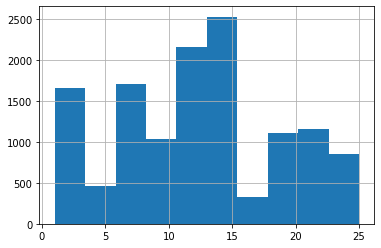

In [53]:
target = df[df['Resp: klasyf gosp narod /GUS 86/ 25 kat'] != 98.0]
# target.hist()
target['Resp: klasyf gosp narod /GUS 86/ 25 kat'].hist()